In [49]:
import numpy as np
import pandas as pd 

In [50]:
jobs = pd.read_csv(r"C:\Users\thegy\Documents\Studium\HS FL 4\Mining\DF\alljobs.csv", delimiter = ";")
def getjobdescriptionsaslist(df):
    """
    This Method puts all jobdescriptions of a df into one list of strings
    @param df: The Job dataframe from which to take the descriptions from
    @return: list of strings filled with all job descriptions doc by doc
    """
    #get all descriptions
    descrstr = []
    for i in range(len(df)):
        newstr = df.iloc[i,2].lower()
        descrstr += [newstr]
    return descrstr

#get Job descriptopns as list, whereas each entry is the descriptoion of one file
docs = getjobdescriptionsaslist(jobs)

In [51]:
synonymdf = pd.read_csv(r"C:\Users\thegy\Documents\Studium\HS FL 4\Mining\DF\skillsyns.csv", delimiter = ";")

def getsyns(df):
    whitelist = []
    for i in range(len(synonymdf)):
        whitewords = synonymdf.iloc[i,0].split(", ")
        addlist = []
        for word in whitewords:
            addlist += [word.lower()]
        whitelist += [addlist]
    return whitelist

synlist = getsyns(synonymdf)

In [52]:
"""
for i in range(len(docs)):
    for j in range (len(synlist)):
        if countmat[i,j] > 1:
            print(i,j, countmat[i,j])
"""

'\nfor i in range(len(docs)):\n    for j in range (len(synlist)):\n        if countmat[i,j] > 1:\n            print(i,j, countmat[i,j])\n'

In [60]:
countmat = np.zeros([len(docs), len(synlist)]) 
countall = np.zeros([len(synlist)])

for i, doc in enumerate(docs):
    for j, syns in enumerate(synlist):
        for k,syn in enumerate(syns):
            if syn in doc:
                countmat[i,j] += doc.count(syn)
                countall[j] += doc.count(syn)

In [61]:
#similaritys between terms in a matrix
from sklearn.metrics.pairwise import cosine_similarity
vector = countmat
vec = vector.transpose()
    
#the Terms axis is 0
dim0 = vec.shape[0]
termtermmat = np.empty([dim0,dim0]) 

for x in range(dim0):
    for y in range(dim0):
        termtermmat[x,y]= cosine_similarity([vec[x]],[vec[y]])

In [62]:
newsynlist = []
for i, syn in enumerate(synlist):
    newsynlist += [syn[0]]
synlist = newsynlist

C:\ProgramData\Anaconda3\envs\bi\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


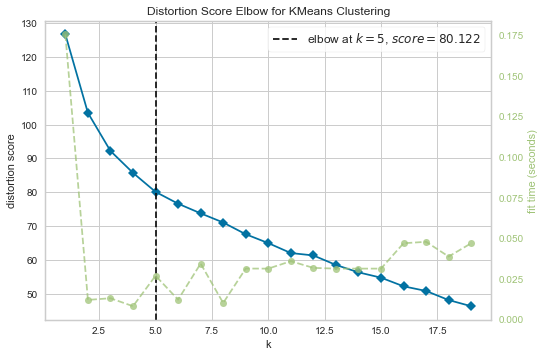

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
matrix = termtermmat

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
visualizer.fit(matrix)
visualizer.poof()

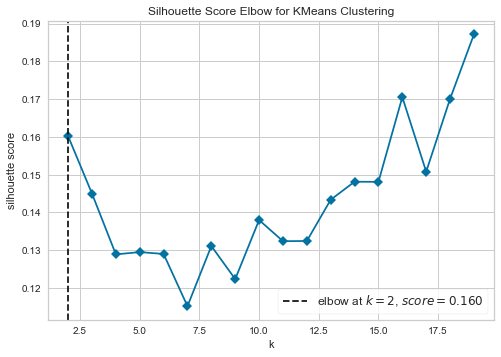

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [64]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(
model, k=(2,20), metric='silhouette', timings=False
)
visualizer.fit(matrix)
visualizer.poof()

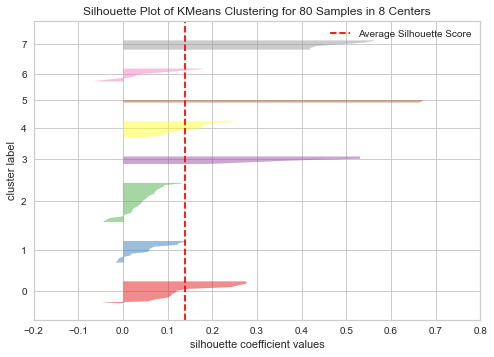

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 80 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [65]:
clu = 8
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(clu)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(matrix)
visualizer.poof()

In [66]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=clu).fit(matrix)

synseries = pd.Series(synlist)
series2 = pd.Series(cluster.labels_)
cluster_df = pd.DataFrame({"term":synseries, "Cluster":series2})

cluster_agg = cluster_df.groupby(["Cluster"]).count()
cluster_agg.reset_index(inplace = True)
cluster_df

,term,Cluster
0,python,7
1,sql,7
2,nosql,2
3,c++,3
4,matlab,0
...,...,...
75,data lake,2
76,business intelligence,7
77,finance,1
78,marketing,1


In [67]:
cluster_df.to_csv(r"C:\Users\thegy\Documents\Studium\HS FL 4\Mining\DF\clusterX.csv", sep=";",decimal=",", index=False)

In [68]:
series3 = pd.Series(countall)
countalldf = pd.DataFrame({"term":synseries, "count":series3})
countalldf

,term,count
0,python,401.0
1,sql,543.0
2,nosql,35.0
3,c++,19.0
4,matlab,19.0
...,...,...
75,data lake,52.0
76,business intelligence,3013.0
77,finance,89.0
78,marketing,250.0


In [69]:
countalldf.to_csv(r"C:\Users\thegy\Documents\Studium\HS FL 4\Mining\DF\countall.csv", sep=";",decimal=",", index=False)

In [70]:
matrix

array([[1.        , 0.63219246, 0.20359125, ..., 0.13795269, 0.20582667,
        0.17478847],
       [0.63219246, 1.        , 0.39419102, ..., 0.16426798, 0.19530605,
        0.15410352],
       [0.20359125, 0.39419102, 1.        , ..., 0.02080063, 0.04926148,
        0.02353104],
       ...,
       [0.13795269, 0.16426798, 0.02080063, ..., 1.        , 0.05874775,
        0.0105234 ],
       [0.20582667, 0.19530605, 0.04926148, ..., 0.05874775, 1.        ,
        0.0623056 ],
       [0.17478847, 0.15410352, 0.02353104, ..., 0.0105234 , 0.0623056 ,
        1.        ]])

In [71]:
"""
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
fig, axes = plt.subplots(figsize=(8,8))
coop_graph = nx.from_pandas_edgelist(graphdf)
nx.draw(coop_graph, with_labels = True)
plt.show(fig)
"""

'\nimport matplotlib.pyplot as plt\nfig = plt.figure(figsize=(12,12))\nfig, axes = plt.subplots(figsize=(8,8))\ncoop_graph = nx.from_pandas_edgelist(graphdf)\nnx.draw(coop_graph, with_labels = True)\nplt.show(fig)\n'

In [79]:
kanten = []

for i in range(len(matrix)):
    for j in range (len(matrix)):
        if(i < j):
            kanten += [[synlist[i],synlist[j],matrix[i,j]]]
            #kanten += [[synlist[i],synlist[j]]]

graph_df = pd.DataFrame(kanten, columns = ["term1","term2","gewicht"])
#graph_df = pd.DataFrame(kanten, columns = ["term1","term2"])
graph_df

,term1,term2,gewicht
0,python,sql,0.632192
1,python,nosql,0.203591
2,python,c++,0.287716
3,python,matlab,0.204186
4,python,php,0.012198
...,...,...,...
3155,business intelligence,marketing,0.209032
3156,business intelligence,use cases,0.156548
3157,finance,marketing,0.058748
3158,finance,use cases,0.010523


NetworkXError: random_state_index is incorrect

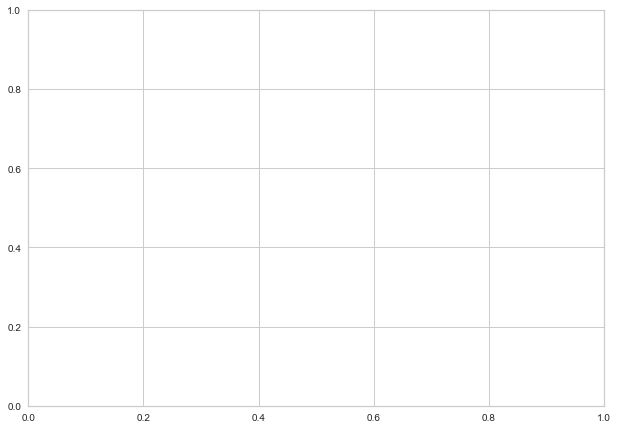

In [83]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import pandas as pd
import matplotlib.pyplot as plt

coop_graph = nx.from_pandas_edgelist(graph_df, source = "term1", target = "term2")
nx.is_directed(coop_graph)
nx.draw(coop_graph, with_labels = True)